### Bryan Medina
### STA4364

In [31]:
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


## Q1

In [27]:
%%R
#install.packages('PRROC')
# load data
shopping_data = read.csv("online_shoppers_intention.csv", stringsAsFactors=TRUE)

# print a summary and see that there are rare categories
print(summary(as.factor(shopping_data$OperatingSystems)))

# function for merging rare categories
merge_rare_categories = function(feature, cut_off=40){
  # figure out which categories have fewer occurences than cutoff
  rare_categories = which(summary(feature)<=cut_off)
  
  # if there are any rare catgories
  if(length(rare_categories) >= 1){
    # make new feature with Misc. category
    feature_new = factor(feature, levels=c(levels(feature), "Misc."))
    # set rare catgories to Misc.
    feature_new[feature %in% rare_categories] = "Misc."
    # remove rare categories from the list of possible categories
    feature_new = factor(feature_new, levels=setdiff(levels(feature_new), rare_categories))
    # return new feature
    return(feature_new)
  }
  # if there are not rare catgories
  else {
    # return original feature
    return(feature)
  }
}

# apply the function to the OperatingSystem
shopping_data$OperatingSystems = merge_rare_categories(as.factor(shopping_data$OperatingSystems))
# print summary of new feature
print(summary(shopping_data$OperatingSystems))

# print a summary and see that there are rare categories
print(summary(as.factor(shopping_data$TrafficType)))

# function for merging rare categories
merge_rare_categories = function(feature, cut_off=40){
  # figure out which categories have fewer occurences than cutoff
  rare_categories = which(summary(feature)<=cut_off)
  
  # if there are any rare catgories
  if(length(rare_categories) >= 1){
    # make new feature with Misc. category
    feature_new = factor(feature, levels=c(levels(feature), "Misc."))
    # set rare catgories to Misc.
    feature_new[feature %in% rare_categories] = "Misc."
    # remove rare categories from the list of possible categories
    feature_new = factor(feature_new, levels=setdiff(levels(feature_new), rare_categories))
    # return new feature
    return(feature_new)
  }
  # if there are not rare catgories
  else {
    # return original feature
    return(feature)
  }
}

# apply the function to the OperatingSystem
shopping_data$TrafficType = merge_rare_categories(as.factor(shopping_data$TrafficType))
# print summary of new feature
print(summary(shopping_data$TrafficType))

# print a summary and see that there are rare categories
print(summary(as.factor(shopping_data$Browser)))

# function for merging rare categories
merge_rare_categories = function(feature, cut_off=40){
  # figure out which categories have fewer occurences than cutoff
  rare_categories = which(summary(feature)<=cut_off)
  
  # if there are any rare catgories
  if(length(rare_categories) >= 1){
    # make new feature with Misc. category
    feature_new = factor(feature, levels=c(levels(feature), "Misc."))
    # set rare catgories to Misc.
    feature_new[feature %in% rare_categories] = "Misc."
    # remove rare categories from the list of possible categories
    feature_new = factor(feature_new, levels=setdiff(levels(feature_new), rare_categories))
    # return new feature
    return(feature_new)
  }
  # if there are not rare catgories
  else {
    # return original feature
    return(feature)
  }
}

# apply the function to the OperatingSystem
shopping_data$Browser = merge_rare_categories(as.factor(shopping_data$Browser))
# print summary of new feature
print(summary(shopping_data$Browser))

/Users/bjm/anaconda3/envs/stats/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: trying URL 'https://mirrors.nics.utk.edu/cran/src/contrib/PRROC_1.3.1.tar.gz'

  warnings.warn(x, RRuntimeWarning)
/Users/bjm/anaconda3/envs/stats/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning:  length 335708 bytes (327 KB)

  warnings.warn(x, RRuntimeWarning)
/Users/bjm/anaconda3/envs/stats/lib/python3.6/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: downloaded 327 KB


  warnings.warn(x, RRuntimeWarning)


   1    2    3    4    5    6    7    8 
2585 6601 2555  478    6   19    7   79 
    1     2     3     4     8 Misc. 
 2585  6601  2555   478    79    32 
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
2451 3913 2052 1069  260  444   40  343   42  450  247    1  738   13   38    3 
  17   18   19   20 
   1   10   17  198 
    1     2     3     4     5     6     8     9    10    11    13    20 Misc. 
 2451  3913  2052  1069   260   444   343    42   450   247   738   198   123 
   1    2    3    4    5    6    7    8    9   10   11   12   13 
2462 7961  105  736  467  174   49  135    1  163    6   10   61 
    1     2     3     4     5     6     7     8    10    13 Misc. 
 2462  7961   105   736   467   174    49   135   163    61    17 


In [28]:
%%R
# Format the columns of categorical variables
shopping_data$Month = as.factor(shopping_data$Month)
shopping_data$OperatingSystems = as.factor(shopping_data$OperatingSystems)
shopping_data$Browser = as.factor(shopping_data$Browser)
shopping_data$Region = as.factor(shopping_data$Region)
shopping_data$TrafficType = as.factor(shopping_data$TrafficType)
shopping_data$VisitorType = as.factor(shopping_data$VisitorType)
shopping_data$Weekend = as.factor(shopping_data$Weekend)
shopping_data$Revenue = as.factor(shopping_data$Revenue)

# Split the dataset into a training set and validation set
sample.sz<- floor(.75*nrow(shopping_data))
# random number generator, which is useful for creating simulations or random objects that can be reproduced.
set.seed(50)

# Sample rows
training <- sample(seq_len(nrow(shopping_data)),size = sample.sz)
# Training set
train <- shopping_data[training,]
# Test set
test <- shopping_data[-training,]

# Logistic Model
log.model = glm(Revenue ~ . , data=train, family="binomial")

# linear discriminant analysis (LDA Model)
library(MASS)
lda.model = lda(Revenue ~ ., data=train)

# Naive Baye's Model
library(e1071)
nb.model = naiveBayes(Revenue ~ ., data=train, laplace=1)

# QDA Model
qda.model = qda(Revenue ~ ., data = train)

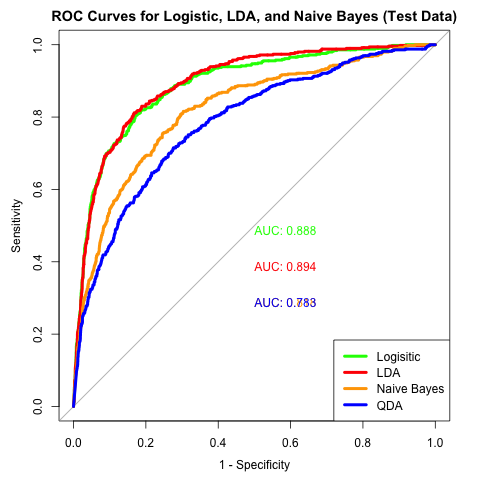

In [29]:
%%R
# predict for logistic model
pred_Shop_log = predict(log.model, newdata=test, type="response")

# predict for lda
pred_Shop_lda = predict(lda.model, newdata=test)
# get second column of predictors, corresponds to prob of 1, so that prediction format is consistent with logistic pred
pred_Shop_lda = pred_Shop_lda$posterior[,2]

# predict for naive Bayes
pred_Shop_nb = predict(nb.model, newdata=test, type="raw")
# get second column of predictors, corresponds to prob of 1, so that prediction format is consistent with logistic pred
pred_Shop_nb = pred_Shop_nb[,2]

# predict for lda
pred_Shop_qda = predict(qda.model, newdata=test)
# get second column of predictors, corresponds to prob of 1, so that prediction format is consistent with logistic pred
pred_Shop_qda = pred_Shop_qda$posterior[,2]

# plot side-by-side ROC curves
library(pROC)
roc_full = roc(test$Revenue, pred_Shop_log, plot=TRUE, print.auc=TRUE, col="green",  
               lwd =4, legacy.axes=TRUE, main="ROC Curves for Logistic, LDA, and Naive Bayes (Test Data)")
roc_lda = roc(test$Revenue, pred_Shop_lda, plot=TRUE, print.auc=TRUE, col="red",
              lwd = 4, print.auc.y=0.4, legacy.axes=TRUE, add=TRUE)
roc_lda = roc(test$Revenue, pred_Shop_nb, plot=TRUE, print.auc=TRUE, col="orange",
              lwd = 4, print.auc.y=0.3, legacy.axes=TRUE, add=TRUE)
roc_qda = roc(test$Revenue, pred_Shop_qda, plot=TRUE, print.auc=TRUE, col="blue",
              lwd = 4, print.auc.y=0.3, legacy.axes=TRUE, add=TRUE)
legend("bottomright", legend=c("Logisitic", "LDA", "Naive Bayes", "QDA"), col=c("green", "red", "orange", "blue"), lwd=4)

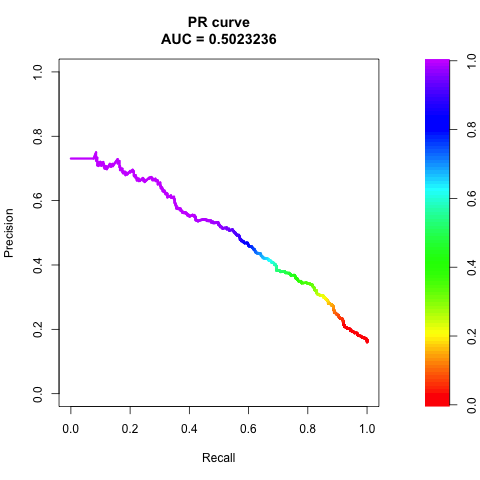

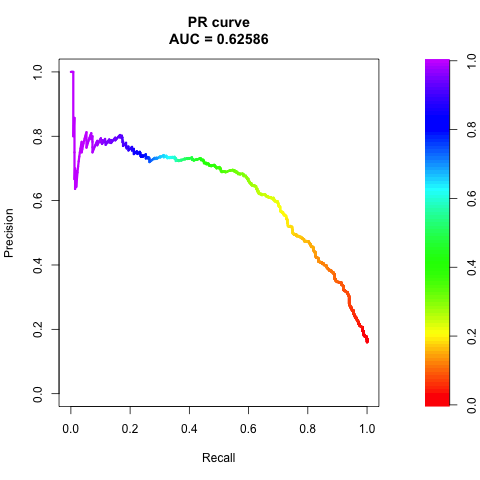

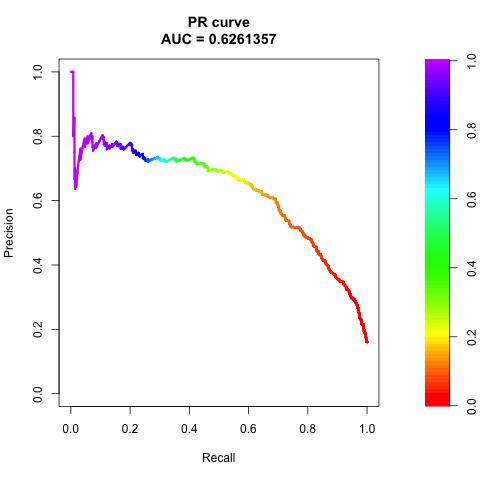

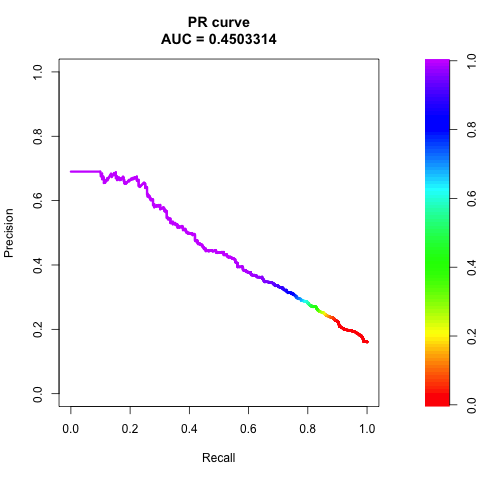

In [30]:
%%R
# PR Curve for Naive Bayes
library(PRROC)
pr_nb_curve = pr.curve(scores.class0=pred_Shop_nb[test$Revenue==TRUE], 
                       scores.class1=pred_Shop_nb[test$Revenue==FALSE], curve=TRUE)
plot(pr_nb_curve)

# PR Curve for Logistic Regression
pr_log_curve = pr.curve(scores.class0=pred_Shop_log[test$Revenue==TRUE], 
                        scores.class1=pred_Shop_log[test$Revenue==FALSE], curve=TRUE)
plot(pr_log_curve)

# PR Curve for LDA
pr_lda_curve = pr.curve(scores.class0=pred_Shop_lda[test$Revenue==TRUE], 
                        scores.class1=pred_Shop_lda[test$Revenue==FALSE], curve=TRUE)
plot(pr_lda_curve)

# PR Curve for LDA
pr_qda_curve = pr.curve(scores.class0=pred_Shop_qda[test$Revenue==TRUE], 
                        scores.class1=pred_Shop_qda[test$Revenue==FALSE], curve=TRUE)
plot(pr_qda_curve)

## Q2
### a)

In [2]:
%load_ext rpy2.ipython

/Users/bjm/anaconda3/envs/stats/lib/python3.6/site-packages/rpy2/ipython/rmagic.py:80: UserWarning: The Python package 'pandas' is strongly recommended when using `rpy2.ipython`. Unfortunately it could not be loaded, as we did not manage to load 'numpy' first.
  "first.")))


In [16]:
%%R
install.packages('e1071')
install.packages("caTools") 
install.packages('caret')
install.packages('SnowballC')

In [17]:
%%R
library(caret)
library(SnowballC)
library('e1071')
library('caTools')
#library(devtools)
#library(caret)

# get stop words
stop_words = read.csv("C50/stop_words.csv")
stop_words = stop_words$stop_words


Error in library(devtools) : there is no package called ‘devtools’


In [4]:
%%R
# get the training and testing directory
train_dir <- "C50/C50Train"
test_dir  <- "C50/C50Test"

# list authors (just for sanity check)
authors <- list.files(train_dir)
print(authors)

 [1] "AaronPressman"     "AlanCrosby"        "AlexanderSmith"   
 [4] "BenjaminKangLim"   "BernardHickey"     "BradDorfman"      
 [7] "DarrenSchuettler"  "DavidLawder"       "EdnaFernandes"    
[10] "EricAuchard"       "FumikoFujisaki"    "GrahamEarnshaw"   
[13] "HeatherScoffield"  "JaneMacartney"     "JanLopatka"       
[16] "JimGilchrist"      "JoeOrtiz"          "JohnMastrini"     
[19] "JonathanBirt"      "JoWinterbottom"    "KarlPenhaul"      
[22] "KeithWeir"         "KevinDrawbaugh"    "KevinMorrison"    
[25] "KirstinRidley"     "KouroshKarimkhany" "LydiaZajc"        
[28] "LynneO'Donnell"    "LynnleyBrowning"   "MarcelMichelson"  
[31] "MarkBendeich"      "MartinWolk"        "MatthewBunce"     
[34] "MichaelConnor"     "MureDickie"        "NickLouth"        
[37] "PatriciaCommins"   "PeterHumphrey"     "PierreTran"       
[40] "RobinSidel"        "RogerFillion"      "SamuelPerry"      
[43] "SarahDavison"      "ScottHillis"       "SimonCowell"      
[46] "TanEeLyn"          

In [35]:
%%R
# function to process document
process_doc = function(doc_text){
  # empty container for words identified
  text_words = c()

  # loop over lines of document
  for(i in 1:length(doc_text)){
    # line starts as a single string. split this of the different strings that are separated by spaces
    line_words = unlist(strsplit(doc_text[[i]], " "))
    # use the process line function below to process the raw string vector
    text_line_processed = process_line(line_words)
    # update the keywords for this document (use unique() to remove duplicates)
    text_words = unique(c(text_words, text_line_processed))
  }
  # take out stopwords from the final processed word list
  text_words = setdiff(text_words, stop_words)
  return(text_words)
}

process_line = function(text_line){
  # take out all characters except for letters
  text_line = gsub("([^A-Za-z ])+", "", x = text_line)
  # change all letters to lowercase
  text_line = unname(sapply(text_line, tolower))
  # convert each word into a word stem to remove related duplicates like plurals
  text_line = unlist(wordStem(text_line, language="en"))
  return(text_line)
}


# define function  to get the vocab list
# function takes folder name as argument (use the train folder to define keywords, don't need test folder here)
get_vocab_list = function(folder_name){
  # initial empty list of keywords
  keywords = c()

  # loop over subfolders (authors)
  for(file_folder in list.files(folder_name)){
    # loop over documents for each author
    for(file in list.files(paste0(folder_name, '/', file_folder))){
      # use the readLines function to read in the text (combine strings for folder, subfolder, and document with paste0())
      # use the process doc function to get list of text words
      # update keywords with new words (use unique() when updating to remove duplicates)
        text_doc = readLines(paste0(folder_name, '/', file_folder, '/', file))
        processed_text = process_doc(text_doc)
        keywords = unique(c(keywords, processed_text))
    }
  }
  return(keywords)
}

# define function to make data frame from vocab list
# function takes either train or test folder name as 
# use this function once for train data, once for test data. Get 2 dataframes
make_data_frame = function(folder_name, keywords){
  # empty data frame
  df = data.frame(matrix(0, nrow=2500, ncol=1+length(keywords)))
  colnames(df) = c(keywords, "Author_Name")
  # counter for row of dataframe
  i = 1
  author = 1
  # loop over subfolders (authors)
  for(file_folder in list.files(folder_name)){
    # loop over documents for each author
    for(file in list.files(paste0(folder_name, '/', file_folder))){
      # use the readLines function to read in the text
      text_file_words = readLines(paste0(folder_name, '/', file_folder, '/', file))
      # use the process doc function to get list of text words
      processed_text = process_doc(text_file_words)
      # get an indicator variable showing which document words are in keywords
      doc_indicator = keywords %in% processed_text
      doc_indicator = c(doc_indicator, author)
      # update data frame row i with doc_indicator (showing which words are in document, 0 for not in doc, 1 for in doc) and author name for response column
      df[i,] = doc_indicator
      # increment i for next doc
      i = i + 1
    }
    author = author + 1
  }
  return(df)
}

In [36]:
%%R
keywords = get_vocab_list(train_dir)
print(length(keywords))

[1] 21838


In [37]:
%%R
df_train = make_data_frame(train_dir, keywords)

In [38]:
%%R
df_test = make_data_frame(test_dir, keywords)

In [101]:
%%R
# calculate percentage of times a single word (each col is a word) appears in the data
df_train_sums = colSums(df_train)/(length(df_train))*100
df_train_mod  = df_train[df_train_sums>=1]
df_test_mod   = df_test[df_train_sums>=1]
#print(colnames(df_test_mod))

  [1] "internet"    "new"         "technolog"   "nation"      "consum"     
  [6] "said"        "wednesday"   "earli"       "investor"    "fund"       
 [11] "later"       "group"       "set"         "world"       "wide"       
 [16] "report"      "direct"      "law"         "inform"      "director"   
 [21] "feder"       "trade"       "commiss"     "major"       "help"       
 [26] "particular"  "use"         "run"         "taken"       ""           
 [31] "million"     "earn"        "month"       "initi"       "money"      
 [36] "charg"       "time"        "local"       "state"       "author"     
 [41] "sale"        "servic"      "custom"      "account"     "place"      
 [46] "sell"        "comput"      "board"       "net"         "signific"   
 [51] "lower"       "good"        "involv"      "busi"        "opportun"   
 [56] "offer"       "share"       "work"        "home"        "announc"    
 [61] "tuesday"     "becom"       "plan"        "boost"       "secur"      
 [66] "avail

### b)

In [127]:
%%R
# learn naive bayes classifier on training set
g = naiveBayes(x=as.matrix(df_train_mod[,-418]), y=as.factor(df_train_mod[,418]))
#g = naiveBayes(Author_Name ~ ., data=df_train_mod[-30])
print(summary(g))

          Length Class  Mode     
apriori    50    table  numeric  
tables    417    -none- list     
levels     50    -none- character
isnumeric 417    -none- logical  
call        3    -none- call     


In [128]:
%%R
#
predictions = predict(g, as.matrix(df_test_mod[,-418]))

In [131]:
%%R
print(predictions)

   [1] 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  40 40 38 1  1  1  1  38 1 
  [25] 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  47 1  1  1  1 
  [49] 27 1  2  2  2  2  2  2  2  2  2  47 27 2  27 2  2  27 15 15 2  2  2  2 
  [73] 2  2  2  2  1  33 1  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 
  [97] 2  2  2  2  1  8  1  38 1  38 38 20 17 1  1  1  17 1  1  1  47 38 20 47
 [121] 1  45 1  2  1  40 8  48 48 15 45 20 1  1  1  20 1  40 47 1  1  33 3  17
 [145] 47 2  1  1  1  1  4  38 38 1  12 28 12 1  4  4  4  38 38 38 38 28 4  38
 [169] 4  38 2  38 38 4  38 38 38 8  8  8  38 8  38 38 4  38 38 38 38 38 38 38
 [193] 38 38 29 38 38 27 4  38 27 2  27 19 47 5  19 49 48 8  2  47 47 27 47 27
 [217] 2  2  2  2  8  33 40 40 1  1  1  1  15 2  1  8  1  1  40 30 38 20 20 27
 [241] 27 1  8  27 27 2  40 40 31 33 1  6  2  8  1  23 47 47 8  2  8  1  40 40
 [265] 47 47 27 40 27 27 27 8  8  47 40 40 41 47 8  40 40 8  8  47 27 27 1  40
 [289] 8  47 23 2  27 8  40 40 40 40 15 40 13 38 1  

In [132]:
%%R
print(table(predictions, as.factor(df_test_mod[,418])))

           
predictions  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
         1  44  2 22  2  8  4  5  3  2  4 26 14  5  2 10  2  7  2  0  1  3  4
         2   0 41  2  1  8  3  3  0  3  0  1 11  1  0  5  0  0 16  2  2  3  1
         3   0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
         4   0  0  0  9  0  0  0  0  0  0  0  1  0  6  0  0  0  0  0  0  0  0
         5   0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
         6   0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
         7   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
         8   0  0  2  4  4 10  4 28  7  2  1  1  3  1  6  0  1  7  2  1  4  5
         9   0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0
         10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
         11  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0  0  0  0  0  0  0  0
         12  0  0  0  2  0  0  0  0  0  0  0  5  0  